* **target**: daily mean PM2.5 particulate matter concentration in the air, PM2.5 refers to atmospheric particulate matter that have a diameter of less than 2.5 micrometers and is one of the most harmful air pollutants.

* **features** summary:
 * *Weather data*: Humidity, temperature, wind speed... + cloud characteristics from the Sentinel 5P satellite data.
 * *Pollutants data*: From The Sentinel 5P satellite data. This satellite monitors various pollutants in the atmosphere. A mix of pollutans data and statellite metadata (it's recommended to focus on the key measurements, either the column_number_density or the tropospheric_X_column_number_density).

In [27]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

In [28]:
raw_train_data = pd.read_csv('../Train.csv')

raw_train_data.shape

(30557, 82)

In [3]:
raw_train_data.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0

In [4]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [5]:
raw_train_data.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,28368.000000,28368.000000,28368.000000,28368.000000,28368.000000,28367.000000,28367.000000,28367.000000,28367.000000,28367.000000,28367.000000,21888.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,2.313200e+04,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,29035.000000,29035.000000,30183.000000,29035.000000,29035.000000,29035.000000,30183.000000,30183.000000,30183.000000,30183.000000,29035.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,23320.000000,23320.000000,23320.000000,23249.000000,23320.000000,23320.000000,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,0.088486,0.000094,0.000163,-1.093982,0.278011,755880.302425,-10.597347,32.764304,-111.413784,44.432617,0.000032,13342.570998,0.000056,0.139533,222.293932,0.423740,-11.308360,35.727367,-117.739509,47.752032,0.036230,983.448217,1438.006332,821611.615359,-12.590815,35.009648,-124.192829,47.605340,4.320685e-05,0.199705,-14.127472,35.849977,-122.640817,46.802819,0.000088,1.064105,2510.989311,77491.774334,0.433513,18.201564,3286.134009,70799.498221,-11.556380,36.520395,-120.055549,48.584734,0.226843,-1.161213,832553.776969,-11.152614,36.667009,-118.855468,48.752878,0.000113,0.429221,0.000032,-1.

In [3]:
raw_test_data = pd.read_csv('../Test.csv')

raw_test_data_columns = raw_test_data.columns.tolist()

raw_train_data_columns = raw_train_data.columns.tolist()

non_features = [column for column in raw_train_data_columns if column not in raw_test_data_columns]

non_features

['target', 'target_min', 'target_max', 'target_variance', 'target_count']

In [13]:
for city in list(raw_test_data['Place_ID'].unique()):
    
    if city not in list(raw_train_data['Place_ID'].unique()):
        
        print('{} is not in training data!'.format(city))
        break

0OS9LVX is not in training data!


* *non features*: 'target', 'target_min', 'target_max', 'target_variance', 'target_count', Place_ID X Date
* missing values exist
* date to be converted from string to datetime
* maybe scaling needs to be done

**assumptions**: 
* *non features*: metadata, Place_ID(some places in test set do not exist in train set), month(coz the train data only covers months 1,2,3,4, even though the test data covers the same months)

In [29]:
## format cell ##

train_data = raw_train_data

train_data['Date'] = pd.to_datetime(raw_train_data['Date'])

train_data['month'] = raw_train_data['Date'].dt.month

train_data['weekday'] = raw_train_data['Date'].dt.weekday

train_data['weekend'] = [1 if i in [5,6] else 0 for i in train_data['weekday']]

train_data[['Date', 'month', 'weekday', 'weekend']].head()

,Date,month,weekday,weekend
0,2020-01-02,1,3,0
1,2020-01-03,1,4,0
2,2020-01-04,1,5,1
3,2020-01-05,1,6,1
4,2020-01-06,1,0,0


## Data Viz

In [5]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') #change the style
#plt.rcParams['figure.figsize'] = [20, 10] #increase figure size

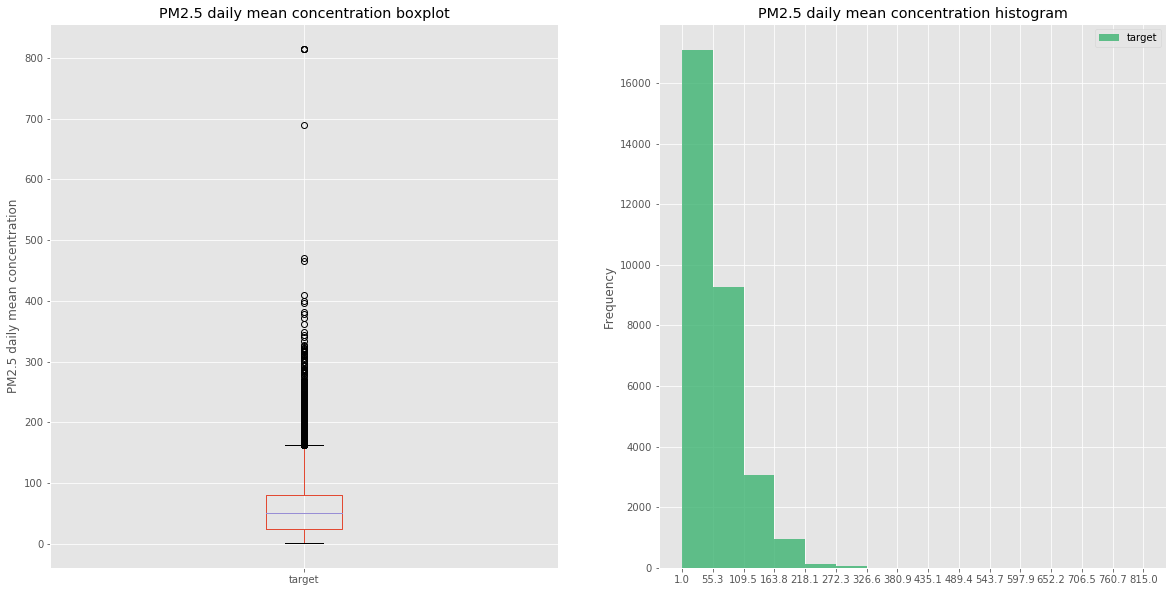

In [6]:
plt.figure(figsize= (20,10)) #Width, height in inches

ax0 = plt.subplot(121)

train_data[['target']].plot(kind= 'box', ax= ax0)
plt.ylabel('PM2.5 daily mean concentration')
plt.title('PM2.5 daily mean concentration boxplot')

ax1 = plt.subplot(122)

count, bin_edges = np.histogram(train_data[['target']], 15)
train_data[['target']].plot(kind= 'hist',
                            bins= 15,
                            color= 'mediumseagreen',
                            alpha= 0.8, #sets the color's transparency
                            xticks= bin_edges,
                            ax= ax1)
plt.title('PM2.5 daily mean concentration histogram')

plt.show()

### Target by weather

In [5]:
weather_features = ['precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground', 
       'L3_CLOUD_cloud_base_height',
       'L3_CLOUD_cloud_base_pressure', 'L3_CLOUD_cloud_fraction', 
       'L3_CLOUD_cloud_optical_depth', 'L3_CLOUD_cloud_top_height', 
       'L3_CLOUD_cloud_top_pressure', 'L3_CLOUD_sensor_azimuth_angle', 
       'L3_CLOUD_sensor_zenith_angle', 'L3_CLOUD_solar_azimuth_angle', 
       'L3_CLOUD_solar_zenith_angle', 'L3_CLOUD_surface_albedo']

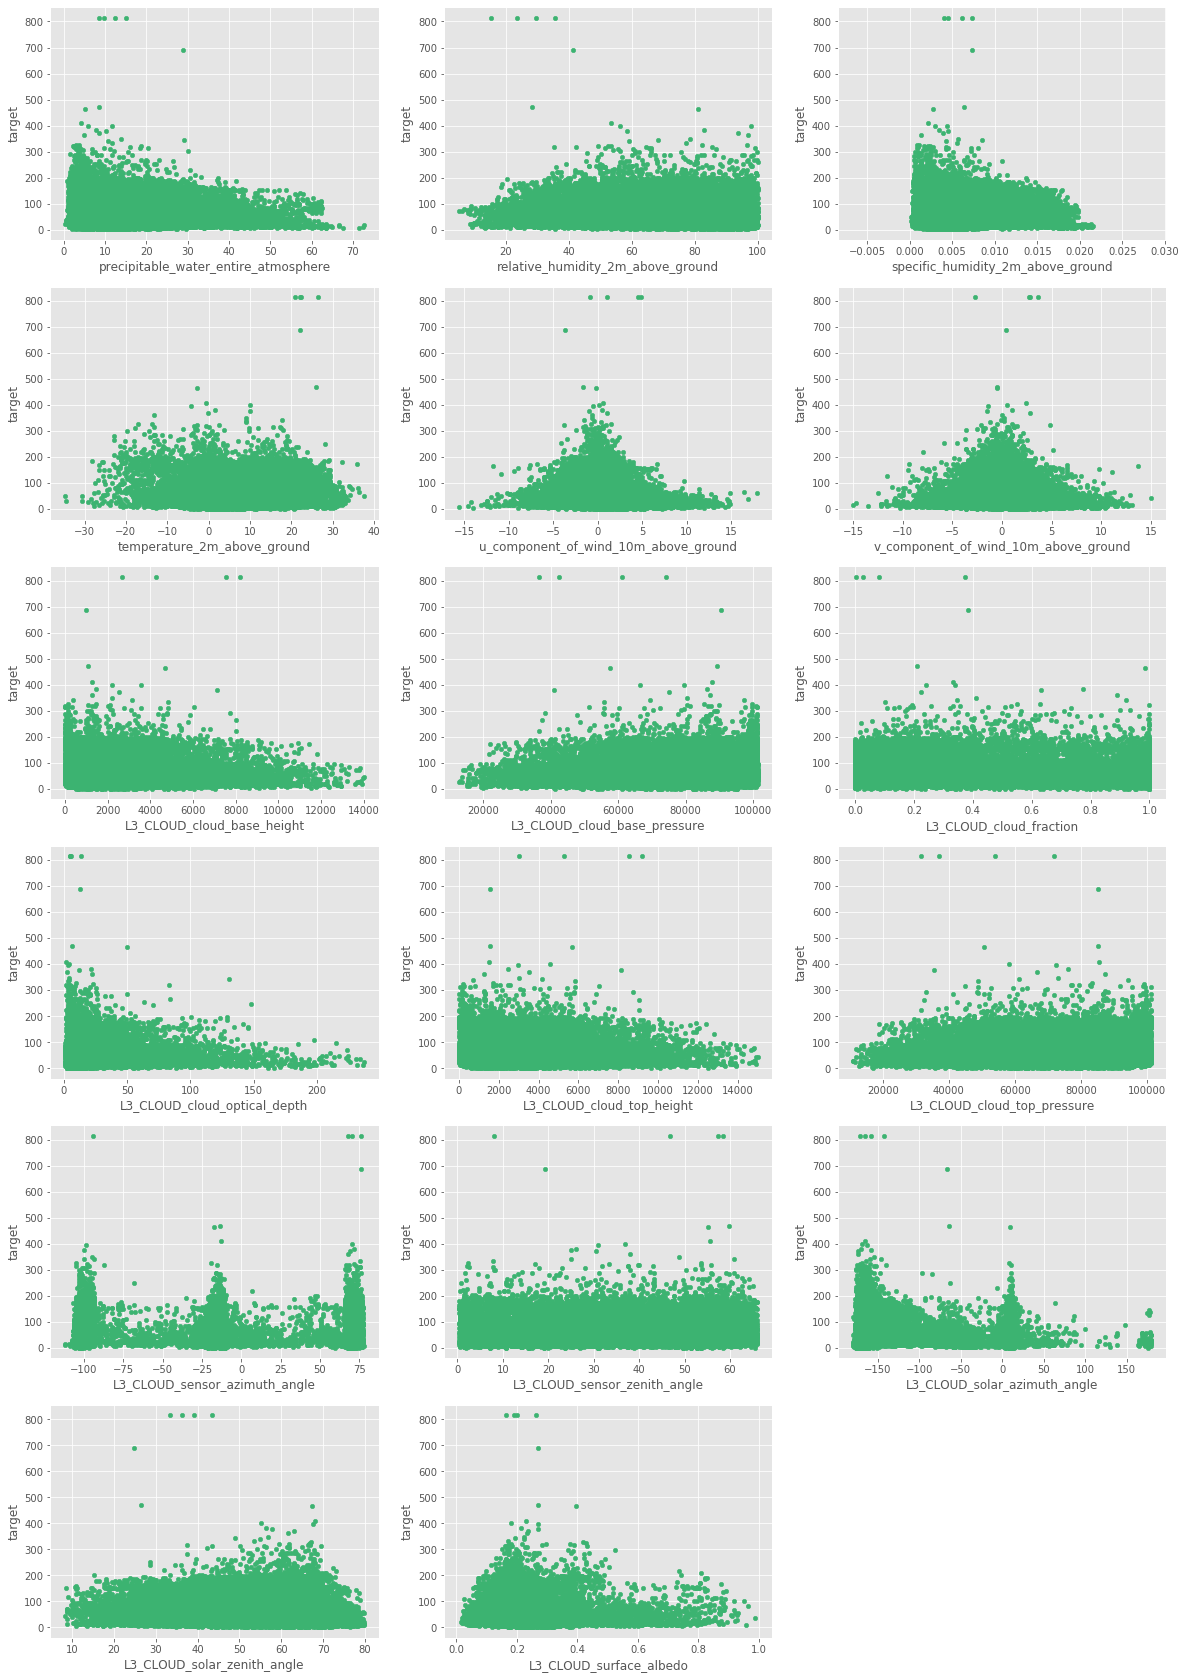

In [7]:
plt.figure(figsize= (20,30))

for i in range(1, len(weather_features) + 1):
    
    ax = plt.subplot(6, 3, i)
    
    train_data.plot(kind= 'scatter',
                    x= weather_features[i-1],
                    y= 'target',
                    color= 'mediumseagreen',
                    ax= ax)

plt.show()

*Clearly* interesting features:

* precipitable_water_entire_atmosphere
* u_component_of_wind_10m_above_ground 
* v_component_of_wind_10m_above_ground
* L3_CLOUD_cloud_optical_depth
* L3_CLOUD_sensor_azimuth_angle

### Target by time

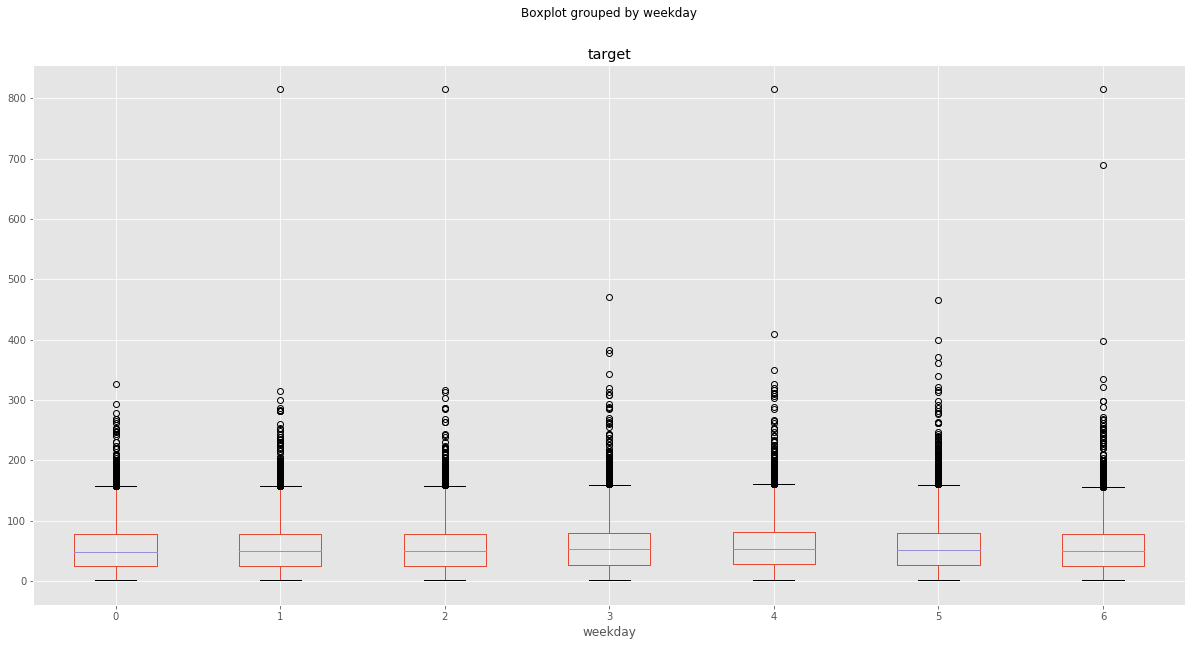

In [14]:
train_data.boxplot(figsize= (20,10), column= 'target', by= 'weekday')

plt.show()

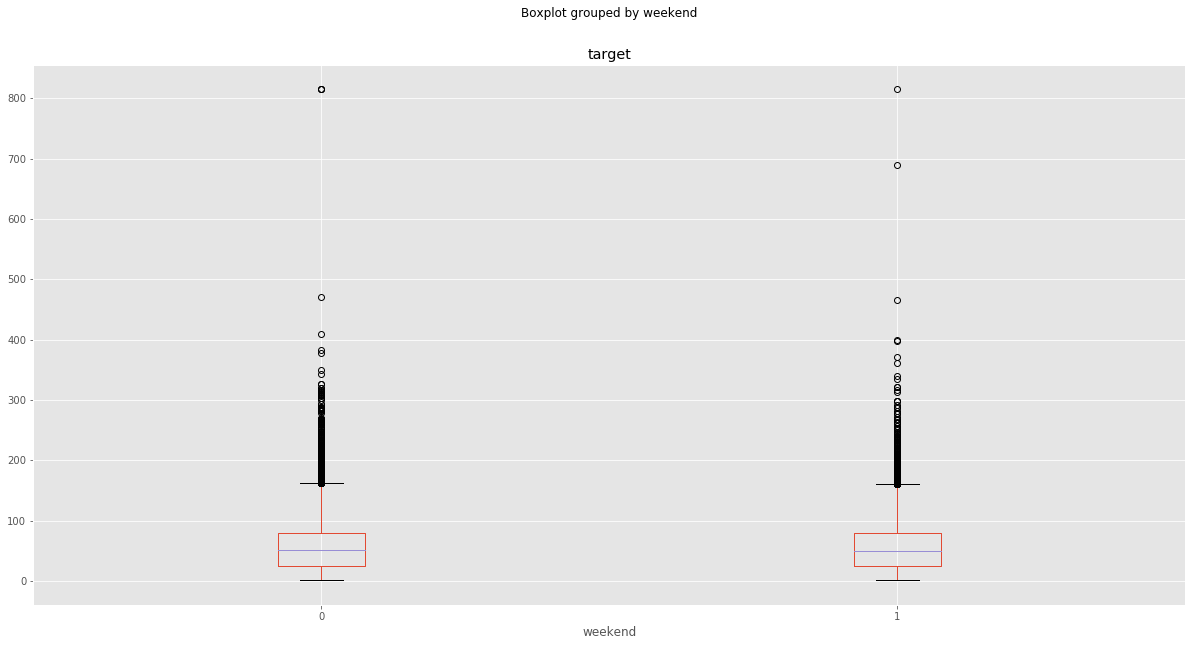

In [15]:
train_data.boxplot(figsize= (20,10), column= 'target', by= 'weekend')

plt.show()

### Target by pollutans

In [6]:
pollutants = ['NO2', 'O3', 'CO', 'HCHO', 'SO2', 'CH4']

pollutants_features = []

for pollutant in pollutants:
    
    pollutant_features = [i for i in raw_train_data_columns if pollutant in i]
    
    if [i for i in pollutant_features if 'L3_' + pollutant + '_' + pollutant + '_column_number_density' == i]:
        
        pollutants_features.extend([i for i in pollutant_features if 'L3_' + pollutant + '_' + pollutant + '_column_number_density' == i])
    
    else:
        
        pollutants_features.extend([i for i in pollutant_features if 'L3_' + pollutant + '_tropospheric_' + pollutant + '_column_number_density' == i])

pollutants_features.extend([i for i in raw_train_data_columns if 'AER_AI' in i])

pollutants_features

['L3_NO2_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_CO_CO_column_number_density',
 'L3_HCHO_tropospheric_HCHO_column_number_density',
 'L3_SO2_SO2_column_number_density',
 'L3_AER_AI_absorbing_aerosol_index',
 'L3_AER_AI_sensor_altitude',
 'L3_AER_AI_sensor_azimuth_angle',
 'L3_AER_AI_sensor_zenith_angle',
 'L3_AER_AI_solar_azimuth_angle',
 'L3_AER_AI_solar_zenith_angle']

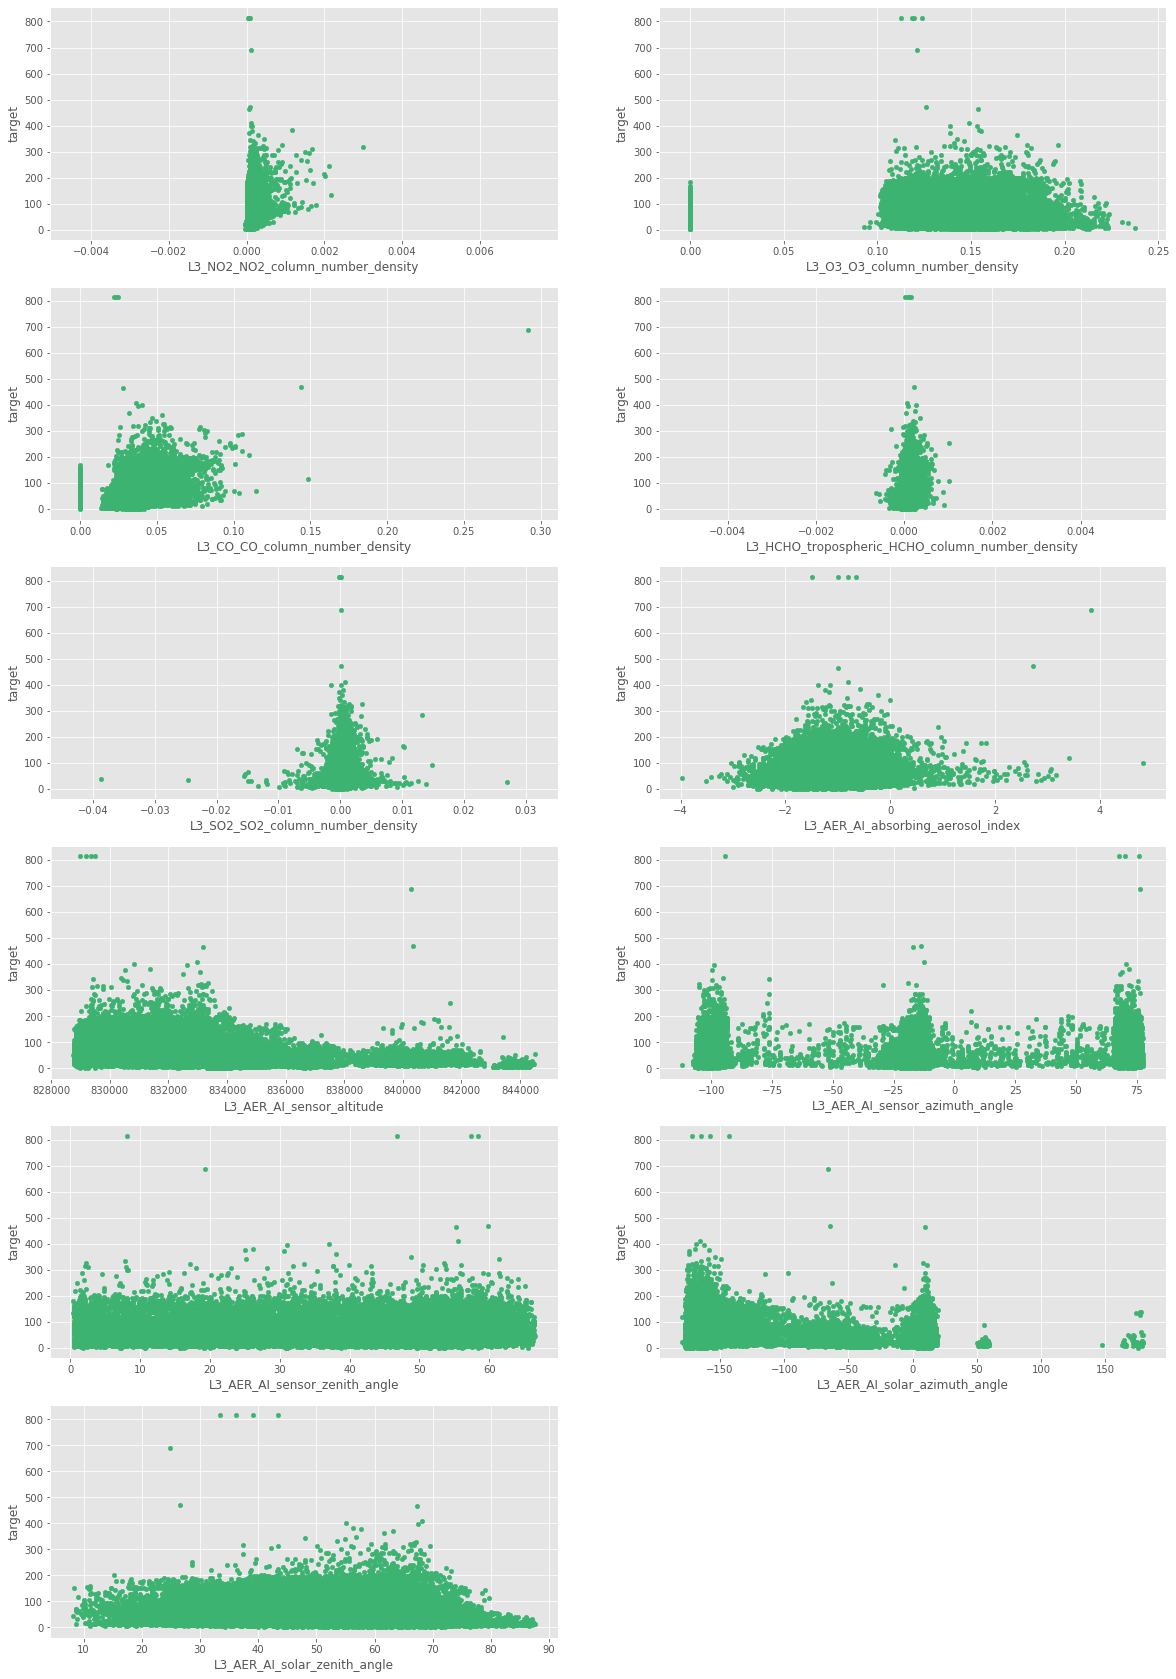

In [20]:
plt.figure(figsize= (20,30))

for i in range(1, len(pollutants_features) + 1):
    
    ax = plt.subplot(6, 2, i)
    
    train_data.plot(kind= 'scatter',
                    x= pollutants_features[i-1],
                    y= 'target',
                    color= 'mediumseagreen',
                    ax= ax)

plt.show()

*Clearly* interesting features:

* L3_SO2_SO2_column_number_density
* L3_AER_AI_absorbing_aerosol_index
* L3_AER_AI_sensor_azimuth_angle

## Preprocessing

In [12]:
from sklearn import preprocessing

In [30]:
## format cell ##

features = weather_features + pollutants_features + ['weekend', 'weekday']

train_data = train_data[features + ['target']]

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   precipitable_water_entire_atmosphere             30557 non-null  float64
 1   relative_humidity_2m_above_ground                30557 non-null  float64
 2   specific_humidity_2m_above_ground                30557 non-null  float64
 3   temperature_2m_above_ground                      30557 non-null  float64
 4   u_component_of_wind_10m_above_ground             30557 non-null  float64
 5   v_component_of_wind_10m_above_ground             30557 non-null  float64
 6   L3_CLOUD_cloud_base_height                       29035 non-null  float64
 7   L3_CLOUD_cloud_base_pressure                     29035 non-null  float64
 8   L3_CLOUD_cloud_fraction                          30183 non-null  float64
 9   L3_CLOUD_cloud_optical_depth

In [31]:
## format cell ##

## Missing values

train_data.fillna(train_data.mean(), inplace= True) #impute NAs with means

train_data.isnull().sum()

/home/marwen/.local/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


precipitable_water_entire_atmosphere               0
relative_humidity_2m_above_ground                  0
specific_humidity_2m_above_ground                  0
temperature_2m_above_ground                        0
u_component_of_wind_10m_above_ground               0
v_component_of_wind_10m_above_ground               0
L3_CLOUD_cloud_base_height                         0
L3_CLOUD_cloud_base_pressure                       0
L3_CLOUD_cloud_fraction                            0
L3_CLOUD_cloud_optical_depth                       0
L3_CLOUD_cloud_top_height                          0
L3_CLOUD_cloud_top_pressure                        0
L3_CLOUD_sensor_azimuth_angle                      0
L3_CLOUD_sensor_zenith_angle                       0
L3_CLOUD_solar_azimuth_angle                       0
L3_CLOUD_solar_zenith_angle                        0
L3_CLOUD_surface_albedo                            0
L3_NO2_NO2_column_number_density                   0
L3_O3_O3_column_number_density                

In [15]:
# ## format cell ##

# ## Generate polynomial and interaction features

# polynomial_features = preprocessing.PolynomialFeatures(degree= 3, include_bias= False)

# x = polynomial_features.fit_transform(train_data.loc[:, ~train_data.columns.isin(['target', 'weekday', 'weekend'])])

# train_data = pd.concat([pd.DataFrame(x, columns= polynomial_features.get_feature_names(train_data.loc[:, ~train_data.columns.isin(['target', 'weekday', 'weekend'])].columns)),
#              train_data[['target', 'weekday', 'weekend']]], axis= 1)

In [32]:
## format cell ##

## Categorical features

# train_data = pd.get_dummies(train_data, columns= ['weekday'])

train_data[['weekday', 'weekend']] = train_data[['weekday', 'weekend']].astype(str)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   precipitable_water_entire_atmosphere             30557 non-null  float64
 1   relative_humidity_2m_above_ground                30557 non-null  float64
 2   specific_humidity_2m_above_ground                30557 non-null  float64
 3   temperature_2m_above_ground                      30557 non-null  float64
 4   u_component_of_wind_10m_above_ground             30557 non-null  float64
 5   v_component_of_wind_10m_above_ground             30557 non-null  float64
 6   L3_CLOUD_cloud_base_height                       30557 non-null  float64
 7   L3_CLOUD_cloud_base_pressure                     30557 non-null  float64
 8   L3_CLOUD_cloud_fraction                          30557 non-null  float64
 9   L3_CLOUD_cloud_optical_depth

/home/marwen/.local/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
train_data.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_NO2_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_SO2_SO2_column_number_density,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,weekend,target
count,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000
mean,0.206183,0.689609,0.273105,0.609957,0.476701,0.502412,0.178829,0.730574,0.433513,0.072851,0.218552,0.662401,0.529329,0.550046,0.166310,0.563976,0.217020,0.047601,0.587131,0.124274,0.436489,0.591164,0.319162,0.241216,0.531801,0.548505,0.168784,0.511126,0.285990,61.148045
std,0.148082,0.198246,0.176349,0.129613,0.080800,0.087832,0.156407,0.202646,0.348799,0.098214,0.156737,0.200645,0.374679,0.278630,0.189697,0.196419,0.102189,0.029645,0.127789,0.033935,0.049713,0.011948,0.061035,0.185341,0.371884,0.277050,0.190590,0.179855,0.451892,46.861309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.100397,0.563620,0.151963,0.523972,0.431505,0.452404,0.057895,0.605904,0.114288,0.018051,0.103498,0.530016,0.079913,0.315503,0.039086,0.422272,0.158644,0.035554,0.512273,0.111199,0.409654,0.588752,0.278918,0.105830,0.081283,0.315462,0.038187,0.380832,0.000000,25.000000
50%,0.163203,0.726999,0.222244,0.598263,0.470889,0.499897,0.142184,0.760308,0.349124,0.035165,0.185674,0.682707,0.515018,0.601968,0.065046,0.565437,0.204346,0.042608,0.591058,0.124274,0.436489,0.591164,0.317581,0.210697,0.514476,0.605813,0.064354,0.512614,0.000000,50.000000
75%,0.269880,0.846635,0.345622,0.705402,0.517162,0.551186,0.252565,0.898221,0.766825,0.080538,0.299365,0.814457,0.955328,0.788520,0.287035,0.710473,0.246345,0.051778,0.663732,0.132344,0.450265,0.592333,0.357995,0.339220,0.955368,0.784222,0.315475,0.643463,1.000000,80.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,815.000000


In [54]:
# ## format cell ##

# ## Normalization

# min_max_scaler = preprocessing.MinMaxScaler()

# min_max_scaler.fit(train_data.loc[:, train_data.columns != 'target'])

# #print(min_max_scaler.data_max_)

# train_data.loc[:, train_data.columns != 'target'] = min_max_scaler.transform(train_data.loc[:, train_data.columns != 'target'])

# train_data.head()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_NO2_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_SO2_SO2_column_number_density,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,weekend,target,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.146577,0.580485,0.367893,0.737520,0.523829,0.458665,0.178829,0.730574,0.000000,0.072851,0.218552,0.662401,0.993812,0.581611,0.328522,0.195995,0.217020,0.040916,0.501130,0.072308,0.421792,0.587522,0.311187,0.727754,0.993823,0.578274,0.327867,0.178027,0.0,38.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.196453,0.460322,0.384190,0.793421,0.563634,0.459971,0.011866,0.977990,0.059358,0.021000,0.011009,0.978467,0.512712,0.901923,0.311993,0.283722,0.308023,0.041638,0.484652,0.075520,0.486896,0.591737,0.328109,0.763537,0.513069,0.895902,0.311276,0.256985,0.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.221390,0.297997,0.342748,0.855632,0.615411,0.615848,0.019077,0.964011,0.082247,0.020141,0.033284,0.937708,0.035572,0.752896,0.282365,0.363465,0.299864,0.038547,0.487585,0.070923,0.458273,0.591734,0.337357,0.804066,0.036278,0.747833,0.281617,0.328694,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.089941,0.170456,0.175583,0.813194,0.553895,0.536022,0.026781,0.954273,0.121555,0.022221,0.032377,0.943919,0.040145,0.438272,0.294735,0.310817,0.271271,0.043786,0.595649,0.072743,0.432047,0.592907,0.362859,0.784527,0.040848,0.435227,0.294000,0.281349,1.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.186755,0.417106,0.242636,0.713930,0.542490,0.588254,0.307732,0.531205,0.037008,0.013576,0.353866,0.460525,0.900559,0.005990,0.309436,0.259653,0.228733,0.039786,0.531737,0.129540,0.468193,0.595379,0.492901,0.762908,0.900632,0.005728,0.308717,0.235341,0.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dev

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
# create train and validation data sets

x_train, x_val, y_train, y_val = train_test_split(train_data.loc[:, train_data.columns != 'target'], 
                                                  train_data[['target']], 
                                                  test_size= 0.2, 
                                                  random_state= 1)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(24445, 30)
(6112, 30)
(24445, 1)
(6112, 1)


#### Linear regression

In [56]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression().fit(x_train, y_train)

coeffs = pd.DataFrame(np.transpose(lr_model.coef_), 
                      index= x_train.columns, columns=['Coefficient'])

coeffs.loc[abs(coeffs).sort_values(by= 'Coefficient', ascending= False).index, :]

,Coefficient
weekend,-6.512141e+14
weekday_6,5.513315e+14
weekday_5,5.513315e+14
weekday_0,-9.988263e+13
weekday_1,-9.988263e+13
weekday_2,-9.988263e+13
weekday_3,-9.988263e+13
weekday_4,-9.988263e+13
L3_CLOUD_cloud_top_height,1.480888e+03
L3_CLOUD_cloud_base_height,-1.459740e+03


#### Decision tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(criterion= 'mse', max_depth= 10).fit(x_train, y_train)

In [40]:
# evaluation

print('RMSE on training data:', mean_squared_error(y_train, dt_model.predict(x_train), squared= False)) #squared= False returns RMSE instead of MSE

print('RMSE on validation data:', mean_squared_error(y_val, dt_model.predict(x_val), squared= False))

RMSE on training data: 29.457350438134277
RMSE on validation data: 38.541266880386935


## Prediction

In [44]:
# define a function that formats new data so that it can be fed to the model

def format_for_prediction(data, features, scaler= False, categorical_features= False, poly_transformer= False):

    # add time features
    
    data['Date'] = pd.to_datetime(data['Date'])

    data['month'] = data['Date'].dt.month

    data['weekday'] = data['Date'].dt.weekday

    data['weekend'] = [1 if i in [5,6] else 0 for i in data['weekday']]

    # select relevant features

    data = data[features]
    
    # Missing values imputation

    data.fillna(data.mean(), inplace= True)
    
    # generate polynomial and interaction features
    
    if poly_transformer:
        
        x = poly_transformer.fit_transform(data.loc[:, ~data.columns.isin(['weekday', 'weekend'])])

        data = pd.concat([pd.DataFrame(x, columns= poly_transformer.get_feature_names(data.loc[:, ~data.columns.isin(['weekday', 'weekend'])].columns)),
               data[['weekday', 'weekend']]], axis= 1)

    # categorical features
    
    if categorical_features:
        
#         data = pd.get_dummies(data, columns= categorical_features)

#         columns = data.columns
         data[categorical_features] = data[categorical_features].astype(str)
    
    # Normalization
    
    if scaler:
        
        data = scaler.transform(data) # returns a np array
    
    
    return data #pd.DataFrame(data, columns= columns)

In [45]:
formatted_data = format_for_prediction(raw_test_data, 
                                       features= features, 
                                       categorical_features= ['weekday', 'weekend'])
formatted_data.head()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_NO2_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_SO2_SO2_column_number_density,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,weekend,weekday
0,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.000053,0.113310,0.017953,0.000088,0.000221,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0,3
1,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,0.000050,0.110397,0.019576,0.000074,0.000034,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0,4
2,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,5188.524088,61477.291929,0.007849,6.415458,5797.742161,57757.842218,75.552445,55.872276,-94.015418,14.140820,0.279277,0.000050,0.112502,0.018736,0.000042,0.000184,-0.254250,834839.050781,75.552445,55.872276,-94.015418,14.140820,1,5
3,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,2601.282362,74707.128398,0.061411,6.446504,2629.112962,74535.286185,-102.285125,59.174188,-97.247602,32.730553,0.359061,0.000055,0.113312,0.018304,0.000013,0.000201,-0.268491,836269.833912,-102.285091,59.174917,-97.248047,32.730747,1,6
4,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,2557.196696,74589.276717,0.042168,6.874006,2571.293308,74483.680310,-102.133957,40.925873,-96.057265,28.320527,0.331468,0.000055,0.114592,0.018666,-0.000027,0.000093,0.460720,836043.111009,-102.133960,40.925873,-96.057236,28.320528,0,0


In [46]:
predicted_target = dt_model.predict(formatted_data)

submitted_data = pd.DataFrame({'Place_ID X Date': raw_test_data['Place_ID X Date'],
                               'target': predicted_target.reshape(-1)})

submitted_data.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,38.790541
1,0OS9LVX X 2020-01-03,38.790541
2,0OS9LVX X 2020-01-04,38.790541
3,0OS9LVX X 2020-01-05,38.790541
4,0OS9LVX X 2020-01-06,38.790541


In [47]:
submitted_data.to_csv('../submission_4', index= False)